C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1220715515.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1220715515.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1220715515.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

FileNotFoundError: [Errno 2] No such file or directory: '/content/Cars93.csv'

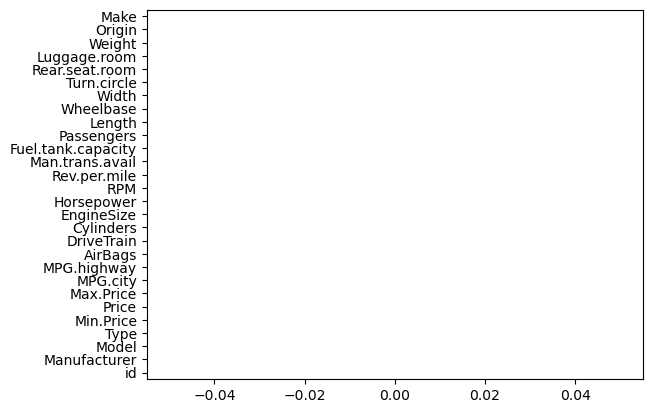

In [1]:
import pandas as pd
df = pd.read_csv("D:/ETL HIVE/PYTHON/ADV PY/Cars93.csv")
df
for i in df.columns:
  if df[i].dtypes==object:
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())
df.isna().sum().plot(kind='barh')
X=df.drop('Price',axis=1)
X
Y=df[['Price']]
Y
cat=[]
con=[]
for i in X.columns:
  if X[i].dtypes==object:
    cat.append(i)
  else:
    con.append(i)
Xcat=X[cat]
Xcon=X[con]
Xcat
Xcon
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()
for i in Xcat.columns:
  Xcat[i]=le.fit_transform(Xcat[i])
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)
Xcon
X=Xcon.join(Xcat)
X
out=[]
for i in Xcon.columns:
  o=Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
  out.extend(o)
out
a=list(set(out))
a
X=X.drop(index=a,axis=0)
Y=Y.drop(index=a,axis=0)
X.index=range(X.shape[0])
Y.index=range(Y.shape[0])
X.shape
Y.shape
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
xtrain.shape
ytrain.shape
from sklearn.svm import SVR
sv=SVR(kernel='linear')
model=sv.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import r2_score
tr_score=r2_score(ytrain,tr_pred)
tr_score
ts_score=r2_score(ytest,ts_pred)
ts_score



df=pd.read_csv('/content/Cars93.csv')
df
for i in df.columns:
  if df[i].dtypes==object:
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())
X=df.drop('Origin',axis=1)
X
Y=df[['Origin']]
Y
cat=[]
con=[]
for i in X.columns:
  if X[i].dtypes==object:
    cat.append(i)
  else:
    con.append(i)
Xcat=X[cat]
Xcon=X[con]
Xcat
Xcon
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()
for i in Xcat.columns:
  Xcat[i]=le.fit_transform(Xcat[i])
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)
Xcon
X=Xcon.join(Xcat)
X
out=[]
for i in Xcon.columns:
  o=Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
  out.extend(o)
out
a=list(set(out))
a
X=X.drop(index=a,axis=0)
Y=Y.drop(index=a,axis=0)
X.index=range(X.shape[0])
Y.index=range(Y.shape[0])

X.shape
Y.shape
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
xtrain.shape
ytrain.shape
from sklearn.svm import SVC
sv=SVC(kernel='linear')
model=sv.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,tr_pred)
tr_acc
ts_acc=accuracy_score(ytest,ts_pred)
ts_acc
